# PCA-LDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

mat_content = sio.loadmat('/content/drive/MyDrive/face.mat')

mat_content # Let's see the content...

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat May 27 02:07:24 2006',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[106, 130, 191, ...,  70, 183,  77],
        [103, 129, 185, ...,  62, 250,  72],
        [103, 130, 174, ...,  83, 163,  68],
        ...,
        [ 37,  40,  22, ...,  87, 102,  93],
        [ 36,  36,  19, ...,  89,  95, 103],
        [ 41,  35,  17, ...,  94, 106, 110]], dtype=uint8),
 'l': array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
          4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
         12, 12, 12, 12, 12, 12, 12, 12, 13,

In [ ]:
face_data = mat_content['X']

print(face_data) # Each column represents one face image, each row a pixel value for a particular coordinate of the image
print(face_data.shape)

[[106 130 191 ...  70 183  77]
 [103 129 185 ...  62 250  72]
 [103 130 174 ...  83 163  68]
 ...
 [ 37  40  22 ...  87 102  93]
 [ 36  36  19 ...  89  95 103]
 [ 41  35  17 ...  94 106 110]]
(2576, 520)


In [ ]:
face_identity = mat_content['l']

print(face_identity)
print(face_identity.shape)

[[ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3
   3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
   5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
   8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
  10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
  13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15
  15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
  17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20
  20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22
  22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
  25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 26 26 27 27 27 27
  27 27 27 27 27 27 28 28 28 28 28 28 28 28 28 28 29 29 29 29 29 29 29 29
  29 29 30 30 30 30 30 30 30 30 30 30 31 31 31 31 31 31 31 31 31 31 32 32
  32 32 32 32 32 32 32 32 33 33 33 33 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(face_data.T, face_identity.T, test_size=0.2, random_state=42)

print(X_train.shape)

(416, 2576)


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
M_pca = 100
M_lda = 51

pca = PCA(n_components=M_pca)
X_pca = pca.fit_transform(X_train)

lda = LinearDiscriminantAnalysis(n_components=M_lda)
X_lda = lda.fit_transform(X_pca, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# KNN Classifer
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# train KNN with reduced data set
nn = KNeighborsClassifier(n_neighbors=1)
nn.fit(X_lda, y_train.T.ravel())

# test with trained KNN
acc = nn.score(lda.transform(pca.transform(X_test)), y_test.T.ravel())

print("Test Accuracy: ", acc)

Test Accuracy:  0.7692307692307693


We can vary input values to get results.

In [ ]:
list_of_M_pca = []
list_of_M_lda = []
list_of_acc = []

for M_pca in range(5, 416, 5):
  for M_lda in range(1, 51):
    if M_pca <= M_lda:
      break

    pca = PCA(n_components=M_pca)
    X_pca = pca.fit_transform(X_train)

    lda = LinearDiscriminantAnalysis(n_components=M_lda)
    X_lda = lda.fit_transform(X_pca, y_train.ravel())

    # train KNN with reduced data set
    nn = KNeighborsClassifier(n_neighbors=1)
    nn.fit(X_lda, y_train.T.ravel())

    # test with trained KNN
    acc = nn.score(lda.transform(pca.transform(X_test)), y_test.T.ravel())

    list_of_M_pca.append(M_pca)
    list_of_M_lda.append(M_lda)
    list_of_acc.append(acc)

    print("PCA: ", M_pca, " LDA: ", M_lda, " Test Accuracy: ", acc)

PCA:  5  LDA:  1  Test Accuracy:  0.04807692307692308
PCA:  5  LDA:  2  Test Accuracy:  0.07692307692307693
PCA:  5  LDA:  3  Test Accuracy:  0.19230769230769232
PCA:  5  LDA:  4  Test Accuracy:  0.25
PCA:  10  LDA:  1  Test Accuracy:  0.04807692307692308
PCA:  10  LDA:  2  Test Accuracy:  0.11538461538461539
PCA:  10  LDA:  3  Test Accuracy:  0.23076923076923078
PCA:  10  LDA:  4  Test Accuracy:  0.36538461538461536
PCA:  10  LDA:  5  Test Accuracy:  0.375
PCA:  10  LDA:  6  Test Accuracy:  0.47115384615384615
PCA:  10  LDA:  7  Test Accuracy:  0.4423076923076923
PCA:  10  LDA:  8  Test Accuracy:  0.4326923076923077
PCA:  10  LDA:  9  Test Accuracy:  0.4326923076923077
PCA:  15  LDA:  1  Test Accuracy:  0.057692307692307696
PCA:  15  LDA:  2  Test Accuracy:  0.14423076923076922
PCA:  15  LDA:  3  Test Accuracy:  0.23076923076923078
PCA:  15  LDA:  4  Test Accuracy:  0.4423076923076923
PCA:  15  LDA:  5  Test Accuracy:  0.4519230769230769
PCA:  15  LDA:  6  Test Accuracy:  0.5096153846

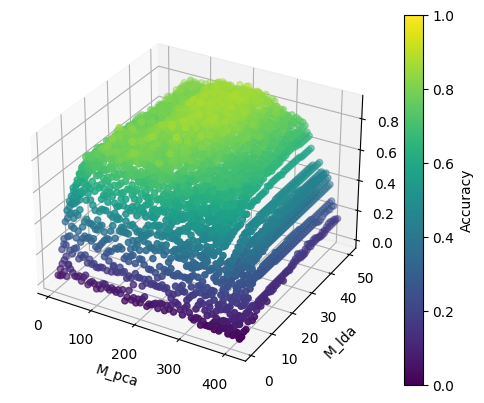

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming you have three lists: list_of_M_pca, list_of_M_lda, and list_of_acc
X = list_of_M_pca
Y = list_of_M_lda
Z = list_of_acc

# Define a colormap based on the 'Accuracy' values
colors = plt.cm.viridis(Z)  # You can choose any colormap you prefer

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X, Y, Z, c=colors, marker='o')  # Use the colors based on 'Accuracy'

# Set labels for the axes
ax.set_xlabel('M_pca')
ax.set_ylabel('M_lda')
ax.set_zlabel('Accuracy')

# Create a colorbar to show the mapping of colors to 'Accuracy' values
cbar = plt.colorbar(scatter)
cbar.set_label('Accuracy')

plt.show()

In [ ]:
# Find the index of the maximum accuracy value
max_A_index = np.argmax(list_of_acc)

# Find the corresponding (K, D) pair for the maximum A
max_PCA = list_of_M_pca[max_A_index]
max_LDA = list_of_M_lda[max_A_index]
max_A = list_of_acc[max_A_index]

print(f"Maximum A: {max_A}")
print(f"Corresponding (PCA, LDA) pair: ({max_PCA}, {max_LDA})")

Maximum A: 0.8846153846153846
Corresponding (PCA, LDA) pair: (160, 36)


In [ ]:
M_pca = 160
M_lda = 36

pca = PCA(n_components=M_pca)
X_pca = pca.fit_transform(X_train)

lda = LinearDiscriminantAnalysis(n_components=M_lda)
X_lda = lda.fit_transform(X_pca, y_train.ravel())

# train KNN with reduced data set
nn = KNeighborsClassifier(n_neighbors=1)
nn.fit(X_lda, y_train.T.ravel())

# test with trained KNN
acc = nn.score(lda.transform(pca.transform(X_test)), y_test.T.ravel())

list_of_M_pca.append(M_pca)
list_of_M_lda.append(M_lda)
list_of_acc.append(acc)

print("PCA: ", M_pca, " LDA: ", M_lda, " Test Accuracy: ", acc)

PCA:  160  LDA:  36  Test Accuracy:  0.8365384615384616


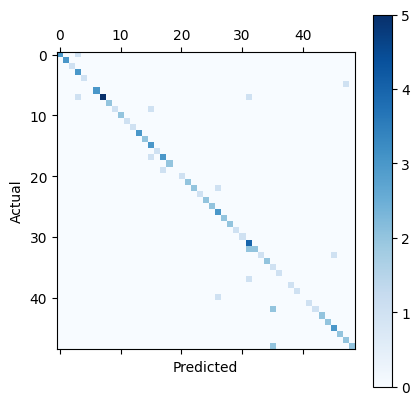

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

y_pred = nn.predict(lda.transform(pca.transform(X_test)))
cfn_matrix = confusion_matrix(y_test, y_pred)

plt.matshow(cfn_matrix, cmap = 'Blues')

plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

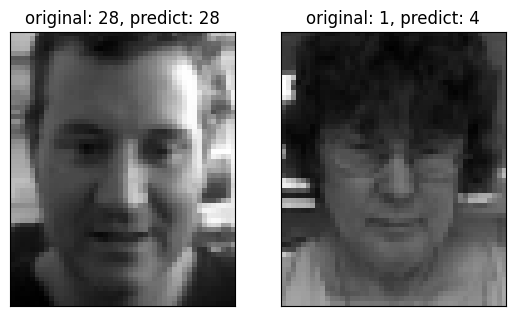

In [ ]:
# find success case
for index in range(len(y_pred)):
  if y_test[index] == y_pred[index]:
    original_image = X_test[index]
    original_face = np.reshape(original_image,(46,56)).T

    plt.subplot(121),plt.imshow(original_face, cmap = 'gist_gray')
    plt.title('original: %d, predict: %d' % (y_test[index], y_pred[index])), plt.xticks([]), plt.yticks([])
    break

# find failure case
for index in range(len(y_pred)):
  if y_test[index] != y_pred[index]:
    original_image = X_test[index]
    original_face = np.reshape(original_image,(46,56)).T

    plt.subplot(122),plt.imshow(original_face, cmap = 'gist_gray')
    plt.title('original: %d, predict: %d' % (y_test[index], y_pred[index])), plt.xticks([]), plt.yticks([])
    break

plt.show()